# 1) Leia o arquivo lemonades.csv usando pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [2]:
file_lemonades_csv = pd.read_csv('./Lemonades.csv', sep = ";")
df = file_lemonades_csv
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


# 2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [3]:
df.describe().round(2)

,Lemon,Orange,Temperature,Leaflets,Price
count,32.00,32.00,32.00,31.00,32.00
mean,116.16,80.00,78.97,108.55,0.35
std,25.82,21.86,4.07,20.12,0.11
min,71.00,42.00,70.00,68.00,0.25
25%,98.00,66.75,77.00,90.00,0.25
50%,113.50,76.50,80.50,108.00,0.35
75%,131.75,95.00,82.00,124.00,0.50
max,176.00,129.00,84.00,158.00,0.50


# 3)Realize a limpeza do dataset:
### - verifique se existe valores nulos
### - remova duplicatas
### - trate os elementos faltantes (interpolação e media)

In [4]:
import datetime

#verificar nulos
print(df.isnull().sum())

#removendo duplicatas
df.drop_duplicates(inplace=True)

# preenchendo Leaflets com a media da coluna
df['Leaflets'].fillna(df.Leaflets.mean(),inplace=True)

## Preenchendo as datas faltantes
df['Date'] = pd.to_datetime(df['Date'])
g = df['Date'].notnull().cumsum()
df['Date'] = df['Date'].ffill() + df['Date'].groupby(g).cumcount().apply(lambda x: datetime.timedelta(days=x))
df.set_index('Date',inplace=True)
df.head(10)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


,Location,Lemon,Orange,Temperature,Leaflets,Price
Date,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25
2016-07-02,Park,98,67,72,90.0,0.25
2016-07-03,Park,110,77,71,104.0,0.25
2016-07-04,Beach,134,99,76,98.0,0.25
2016-07-05,Beach,159,118,78,135.0,0.25
2016-07-06,Beach,103,69,82,90.0,0.25
2016-07-07,Beach,143,101,81,135.0,0.25
2016-07-08,Beach,123,86,82,113.0,0.25
2016-07-09,Beach,134,95,80,126.0,0.25


# 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [5]:
df['Sales'] = df['Lemon'] + df['Orange']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
Date,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164
2016-07-02,Park,98,67,72,90.0,0.25,165
2016-07-03,Park,110,77,71,104.0,0.25,187
2016-07-04,Beach,134,99,76,98.0,0.25,233
2016-07-05,Beach,159,118,78,135.0,0.25,277


# 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [6]:
df['Revenue'] = df['Sales'] * df['Price']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


# 6) retorne o lucro total

In [7]:
df['Revenue'].sum()

2138.0

# 7) escreva uma função que receba dois parâmetros, dataset e temp(int). 
### Se max for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do
### período observado; se -1, retorna a temperatura mínima

In [8]:
def temp_price(df,temp):
    if temp == 1:
        return df['Temperature'].max()
    elif temp == 0:
        return df['Temperature'].mean()
    elif temp == -1:
        return df['Temperature'].min()
    
print('temp max:',temp_price(df,1))
print('temp median: {0:.2f}'.format(temp_price(df,0)))
print('temp min:',temp_price(df,-1))

temp max: 84
temp median: 78.87
temp min: 70


# 8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'


In [9]:
def location_price(df, location):
    aux = df.copy()
    coef = 1.15 if 'Park' in location else 1.1
    aux['Price'] = aux['Price'].apply(lambda x: x * coef)
    return aux

# location: Beach
location_price(df,'Beach').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.275,164,41.00
2016-07-02,Park,98,67,72,90.0,0.275,165,41.25
2016-07-03,Park,110,77,71,104.0,0.275,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25


In [10]:
# location: Park
location_price(df,'Park').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.2875,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.2875,277,69.25


# 9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank


In [11]:
def temp_rank(df):
    df.sort_values(by='Temperature', ascending=False, inplace=True)
    df['temp_rank'] = df.Temperature.notnull().cumsum()
    return df
temp_rank(df).head(10)

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,temp_rank
Date,,,,,,,,,
2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,1
2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,2
2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,3
2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,4
2016-07-10,Beach,140,98,82,131.0,0.25,238,59.50,5
2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,6
2016-07-28,Park,96,63,82,90.0,0.35,159,55.65,7
2016-07-31,Beach,76,47,82,68.0,0.35,123,43.05,8
2016-07-08,Beach,123,86,82,113.0,0.25,209,52.25,9


# 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

In [12]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df.sort_index(inplace=True)
xaxis = df.iloc[:,0:0]
yaxis = df.iloc[:,7:8]

ax = plt.gca()
xaxis = mdates.date2num(xaxis)
hfmt = mdates.DateFormatter('%m\n%d')
ax.xaxis.set_major_formatter(hfmt)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(yaxis)
plt.show()

<Figure size 640x480 with 1 Axes>

# 11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?

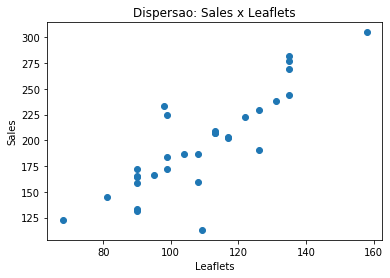

In [13]:
leaflets = df.iloc[:,4:5]
leaflets.reset_index(drop=True,inplace=True)

sales = df.iloc[:,6:7]
sales.reset_index(drop=True,inplace=True)

plt.scatter(leaflets,sales)
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.title('Dispersao: Sales x Leaflets')
plt.show()

In [35]:
import numpy as np
from scipy import stats as sts

leaflets_list = leaflets['Leaflets'].tolist()
sales_list = sales['Sales'].tolist()

print('pearson coef: {0:.2f}'.format(sts.pearsonr(leaflets_list,sales_list)[0]))
print('\nVisualmente percebe-se possível relação linear entre panfletagem e vendas e de fato o coeficiente de correlação de Pearson indica que há uma correlacao forte entre as variáveis aleatórias (p > 0.8)')

pearson coef: 0.84

Visualmente percebe-se possível relação linear entre panfletagem e vendas e de fato o coeficiente de correlação de Pearson indica que há uma correlacao forte entre as variáveis aleatórias (p > 0.8)


# 12) crie um histograma que mostre o lucro (revenue) com 10 bins

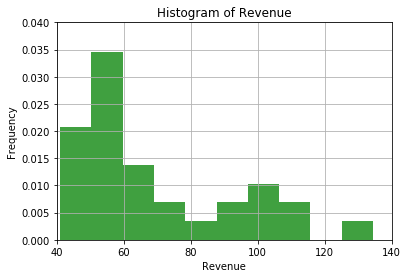

In [40]:
revenues = df['Revenue'].copy()

revenues.reset_index(drop=True,inplace=True)

plt.hist(revenues, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.axis([40, 140, 0, 0.04])
plt.grid(True)
plt.show()

# 13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo.

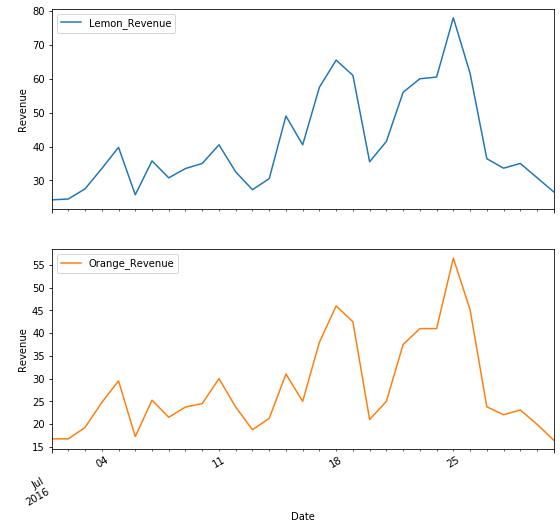

In [36]:
df_new = df.copy()

df_new['Lemon_Revenue'] = df_new.Lemon * df_new.Price
df_new['Orange_Revenue'] = df_new.Orange * df_new.Price

columns_plot = ['Lemon_Revenue', 'Orange_Revenue']
axis = df_new[columns_plot].plot(subplots=True, figsize=(9, 9))
for ax in axis:
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Date')    

# 14) usando regressão linear, prediga vendas a partir de:
- temperature
- leaflets
- price
- retorne o gráfico com a reta ajustada aos dados para cada variável

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

features = ['Temperature','Leaflets','Price']
meta = 'Sales'

# Usamos 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[meta], test_size=0.3, random_state=42)

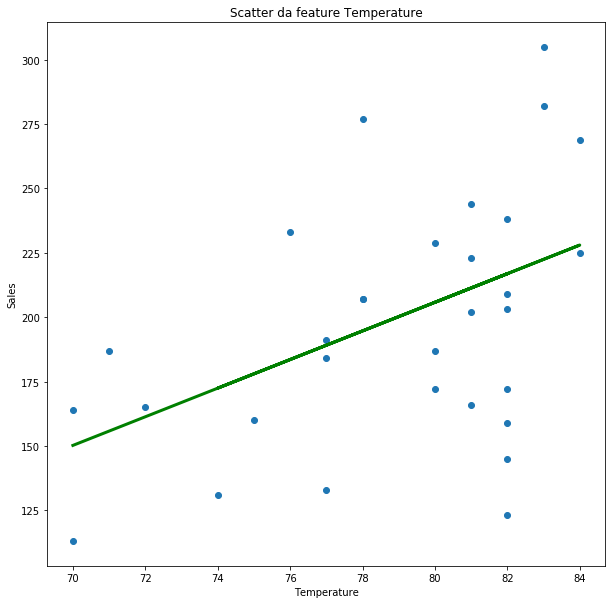

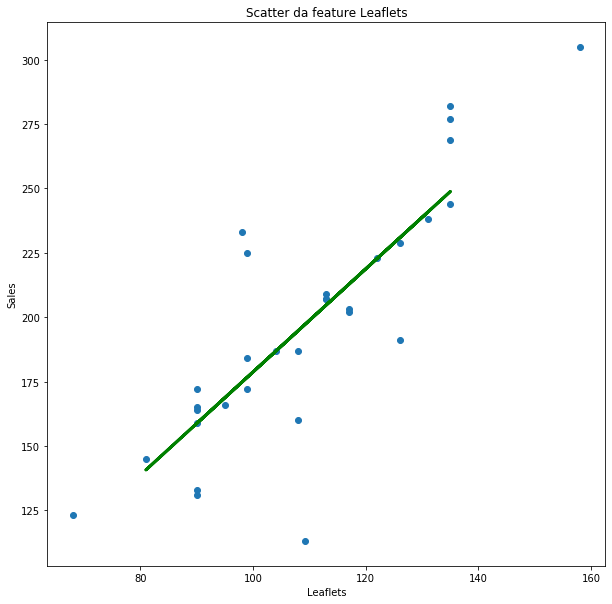

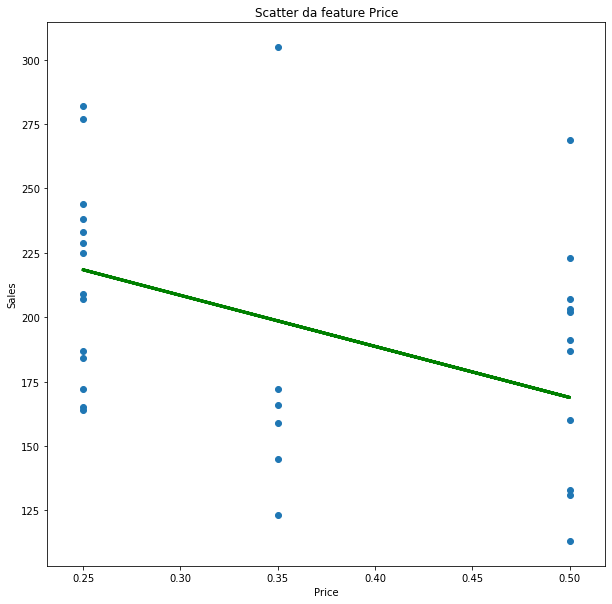

In [83]:
for feature in features:
    reg = linear_model.LinearRegression().fit(X_train[feature].to_frame(), y_train)
    y_predict = reg.predict(X_test[feature].to_frame())

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel(f'{meta}')
    ax.set_title(f'Scatter da feature {feature}')
    ax.scatter(df[feature], df[meta])
    ax.plot(X_test[feature], y_predict, color='green', linewidth=3)
    


# 15) usando regressão linear, prediga vendas a partir das três variáveis juntas

In [87]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [94]:
from sklearn import metrics
mae = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
print('MAE', mae) 
print('R2', r2, f'As variáveis conseguem explicar {r2.round(2) * 100}% da variabilidade do modelo.') 

MAE 316.26044960977043
R2 0.8271848039071226 As variáveis conseguem explicar 83.0% da variabilidade do modelo.


# 16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo para que ele possa ser usado para regressão multivariada

In [4]:
x = np.ones(2)
y = np.ones(2) * 2


np.dot(x, y)



data = np.array([['','X1','X2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
dff = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])


np.column_stack((x,y))

# dff
# theta = np.ones(2)
# arr = dff.values.astype(int)
# print(type(arr))
# print(arr[0])
# print(arr[1])

# arr.shape


array([[1., 2.],
       [1., 2.]])

In [5]:
class LinearRegressionProf():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            J = J + np.power((theta[0] + theta[1] * X[i] - y[i]), 2)
        
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        temp0 = 0
        temp1 = 0
        
        for k in range(num_iter):
        
            for i in range(m):
                temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[i] - y[i]))
                temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[i] - y[i])) * X[i]
                theta[0] = temp0
                theta[1] = temp1
                
            J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history

(array([0.28571851, 1.84685896]),
 array([56.66787826, 56.33769215, 56.0094304 , 55.68308177, 55.35863514,
        55.0360794 , 54.71540354, 54.39659661, 54.07964771, 53.76454601,
        53.45128075, 53.13984122, 52.83021679, 52.52239687, 52.21637095,
        51.91212857, 51.60965935, 51.30895293, 51.00999906, 50.71278751,
        50.41730813, 50.12355084, 49.83150558, 49.54116238, 49.25251133,
        48.96554256, 48.68024626, 48.39661269, 48.11463216, 47.83429504,
        47.55559174, 47.27851275, 47.00304859, 46.72918986, 46.4569272 ,
        46.18625131, 45.91715294, 45.6496229 , 45.38365204, 45.11923128,
        44.85635158, 44.59500397, 44.33517951, 44.07686933, 43.8200646 ,
        43.56475655, 43.31093645, 43.05859563, 42.80772548, 42.55831742,
        42.31036293, 42.06385354, 41.81878082, 41.5751364 , 41.33291196,
        41.09209923, 40.85268997, 40.61467601, 40.37804921, 40.14280149,
        39.90892481, 39.67641118, 39.44525266, 39.21544135, 38.98696939,
        38.759828

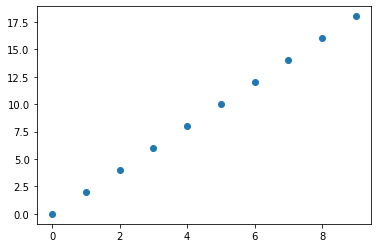

In [6]:
X = np.arange(10)
y = X * 2

plt.scatter(X, y)

lr = LinearRegressionProf()
theta = np.zeros(2)
lr.gradient_descent(X, y, theta, 0.0001, 1000)

In [63]:
class LinearRegression():
    
    def __init__(self, num_iterations=1000, alfa=0.1):
        
        self.__num_iterations = None
        self.__alfa = None
        self.__theta = None
        self.__optimal_error = 0.01
        
        self.__num_iterations = num_iterations
        self.__alpha = alfa
    
    def __cost_function(self, X, y, theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            J = J + np.power((theta[0] + theta[1] * X[i][1] - y[i]), 2)
#             J = J + np.power((X[i].dot(self.__theta) - y[i]), 2)
        
        return J * (1 / (2 * m))
    
    # def gradient_descent(self, X, y, theta, alfa, num_iter):
    def __gradient_descent(self, X, y):
        
        m = len(y)
        n = X.ndim

        J_history = np.zeros(self.__num_iterations)
        
        #temp0 = 0
        #temp1 = 0
        
        temp = np.zeros(n)
        
        #for k in range(num_iter):
        
        k = 0 
        
        print('Alpha', self.__alpha)
        
        while (k < self.__num_iterations):
            for i in range(m):
                #temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))
                #temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                #theta[0] = temp0
                #theta[1] = temp1
#                 temp[0] = temp[0] - self.__alpha * (1/m * (self.__theta[0] * X[i][0] + self.__theta[1] * X[i][1] - y[i])) * X[i][0]
#                 temp[1] = temp[1] - self.__alpha * (1/m * (self.__theta[0] * X[i][0] + self.__theta[1] * X[i][1] - y[i])) * X[i][1]
#                 self.__theta[0] = temp[0]
#                 self.__theta[1] = temp[1]
                
#                 print(self.__theta[0], self.__theta[1])
                
                print('X[i]',  X[i])
                print('Temp', temp)
                print('Theta', self.__theta)
                for j in range(n):
                    temp[j] = temp[j] - self.__alpha * (1/m * (X[i].dot(self.__theta) - y[i])) * X[i][j]
                
                self.__theta = temp.copy()
                print(self.__theta)
            
            cost = self.__cost_function(X, y, self.__theta)
            J_history[k] = cost
            
            k+=1

        #print(k)
#         return self.__theta, J_history
        return self.__theta 
    
    def fit(self, X, y):
        num_columns = X.ndim + 1 # Obtemos o tamanho das colunas + 1 (para generalizar o theta[0] (intercept))
        self.__theta = np.zeros(num_columns)
        X_0 = np.ones(X.shape[0])
        X_train = np.column_stack((X_0, X))
#         print(X_train)
        return self.__gradient_descent(X_train, y)
        
    def predict(self, X):
        X_0 = np.ones(X.shape[0])
        X_predict = np.column_stack((X_0, X))
        print(self.__theta)
#         return X_predict.dot(self.__theta)
        
        

In [64]:
lr = LinearRegression(num_iterations=100, alfa=0.001)
X = np.arange(10)
y = X * 2



lr.fit(X, y)
# lr.__theta
# lr.predict(X)


Alpha 0.001
X[i] [1. 0.]
Temp [0. 0.]
Theta [0. 0.]
[0. 0.]
X[i] [1. 1.]
Temp [0. 0.]
Theta [0. 0.]
[0.0002 0.0002]
X[i] [1. 2.]
Temp [0.0002 0.0002]
Theta [0.0002 0.0002]
[0.00059994 0.00099988]
X[i] [1. 3.]
Temp [0.00059994 0.00099988]
Theta [0.00059994 0.00099988]
[0.00119958 0.0027988 ]
X[i] [1. 4.]
Temp [0.00119958 0.0027988 ]
Theta [0.00119958 0.0027988 ]
[0.00199834 0.00599384]
X[i] [1. 5.]
Temp [0.00199834 0.00599384]
Theta [0.00199834 0.00599384]
[0.00299514 0.01097786]
X[i] [1. 6.]
Temp [0.00299514 0.01097786]
Theta [0.00299514 0.01097786]
[0.00418826 0.01813654]
X[i] [1. 7.]
Temp [0.00418826 0.01813654]
Theta [0.00418826 0.01813654]
[0.00557514 0.02784474]
X[i] [1. 8.]
Temp [0.00557514 0.02784474]
Theta [0.00557514 0.02784474]
[0.00715231 0.04046207]
X[i] [1. 9.]
Temp [0.00715231 0.04046207]
Theta [0.00715231 0.04046207]
[0.00891518 0.05632789]
X[i] [1. 0.]
Temp [0.00891518 0.05632789]
Theta [0.00891518 0.05632789]
[0.00891429 0.05632789]
X[i] [1. 1.]
Temp [0.00891429 0.0563

Theta [0.1833678  1.16437431]
[0.18334947 1.16437431]
X[i] [1. 1.]
Temp [0.18334947 1.16437431]
Theta [0.18334947 1.16437431]
[0.1834147  1.16443953]
X[i] [1. 2.]
Temp [0.1834147  1.16443953]
Theta [0.1834147  1.16443953]
[0.18356347 1.16473707]
X[i] [1. 3.]
Temp [0.18356347 1.16473707]
Theta [0.18356347 1.16473707]
[0.18379569 1.16543374]
X[i] [1. 4.]
Temp [0.18379569 1.16543374]
Theta [0.18379569 1.16543374]
[0.18411114 1.16669553]
X[i] [1. 5.]
Temp [0.18411114 1.16669553]
Theta [0.18411114 1.16669553]
[0.18450938 1.16868674]
X[i] [1. 6.]
Temp [0.18450938 1.16868674]
Theta [0.18450938 1.16868674]
[0.18498971 1.17156876]
X[i] [1. 7.]
Temp [0.18498971 1.17156876]
Theta [0.18498971 1.17156876]
[0.18555112 1.17549858]
X[i] [1. 8.]
Temp [0.18555112 1.17549858]
Theta [0.18555112 1.17549858]
[0.18619216 1.18062695]
X[i] [1. 9.]
Temp [0.18619216 1.18062695]
Theta [0.18619216 1.18062695]
[0.18691098 1.1870963 ]
X[i] [1. 0.]
Temp [0.18691098 1.1870963 ]
Theta [0.18691098 1.1870963 ]
[0.1868922

[0.25130121 1.60498917]
X[i] [1. 2.]
Temp [0.25130121 1.60498917]
Theta [0.25130121 1.60498917]
[0.25135508 1.60509692]
X[i] [1. 3.]
Temp [0.25135508 1.60509692]
Theta [0.25135508 1.60509692]
[0.25144842 1.60537692]
X[i] [1. 4.]
Temp [0.25144842 1.60537692]
Theta [0.25144842 1.60537692]
[0.25158112 1.60590774]
X[i] [1. 5.]
Temp [0.25158112 1.60590774]
Theta [0.25158112 1.60590774]
[0.25175301 1.60676718]
X[i] [1. 6.]
Temp [0.25175301 1.60676718]
Theta [0.25175301 1.60676718]
[0.25196378 1.60803177]
X[i] [1. 7.]
Temp [0.25196378 1.60803177]
Theta [0.25196378 1.60803177]
[0.25221296 1.60977604]
X[i] [1. 8.]
Temp [0.25221296 1.60977604]
Theta [0.25221296 1.60977604]
[0.25249992 1.6120717 ]
X[i] [1. 9.]
Temp [0.25249992 1.6120717 ]
Theta [0.25249992 1.6120717 ]
[0.2528238  1.61498667]
X[i] [1. 0.]
Temp [0.2528238  1.61498667]
Theta [0.2528238  1.61498667]
[0.25279852 1.61498667]
X[i] [1. 1.]
Temp [0.25279852 1.61498667]
Theta [0.25279852 1.61498667]
[0.25281174 1.61499989]
X[i] [1. 2.]
Tem

[0.28121762 1.80851776]
X[i] [1. 6.]
Temp [0.28121762 1.80851776]
Theta [0.28121762 1.80851776]
[0.28130439 1.80903836]
X[i] [1. 7.]
Temp [0.28130439 1.80903836]
Theta [0.28130439 1.80903836]
[0.28140993 1.80977716]
X[i] [1. 8.]
Temp [0.28140993 1.80977716]
Theta [0.28140993 1.80977716]
[0.28153397 1.81076946]
X[i] [1. 9.]
Temp [0.28153397 1.81076946]
Theta [0.28153397 1.81076946]
[0.28167612 1.81204885]
X[i] [1. 0.]
Temp [0.28167612 1.81204885]
Theta [0.28167612 1.81204885]
[0.28164796 1.81204885]
X[i] [1. 1.]
Temp [0.28164796 1.81204885]
Theta [0.28164796 1.81204885]
[0.28163859 1.81203948]
X[i] [1. 2.]
Temp [0.28163859 1.81203948]
Theta [0.28163859 1.81203948]
[0.28164801 1.81205834]
X[i] [1. 3.]
Temp [0.28164801 1.81205834]
Theta [0.28164801 1.81205834]
[0.28167623 1.81214299]
X[i] [1. 4.]
Temp [0.28167623 1.81214299]
Theta [0.28167623 1.81214299]
[0.28172321 1.81233089]
X[i] [1. 5.]
Temp [0.28172321 1.81233089]
Theta [0.28172321 1.81233089]
[0.28178887 1.8126592 ]
X[i] [1. 6.]
Tem

array([0.28648801, 1.84764713])

# 17) aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as mesmas features para treinamento. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning

In [0]:
df_beer = pd.read_csv('./Consumo_cerveja.csv',nrows=365,delimiter=';')
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
df_beer.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [0]:
feature_col = ['maxTemp','precip','weekend']

arr_values = df_beer[feature_col].values

aux = np.array([0])
for line in arr_values:
  x = sum(line)
  aux = np.vstack([aux, x])

aux

In [0]:
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']

X = df_beer[feature_col].values
Y = df_beer[meta_col].values
theta = np.zeros(len(X))
iterations = 1500
alpha = 0.01

In [0]:
lr = LinearRegressionMulti()

In [0]:
custo = lr.cost_function(X,Y,theta)
custo

array([332.26444391])

In [0]:
theta_lr, custo_h = lr.gradient_descent(X,Y,theta,alpha,iterations)
theta_lr

array([89.47521273, -2.63951165,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [0]:
theta_lr.shape

(365,)